# NYC taxi data

Author: M.A.Barrios / Sept. 2017

Description: Estimate of airline market share based on NYC taxi drop-off transit to JFK, La Guardia, and Newark airports. Combines taxi data with airport terminal/airlines information, airport coordinate maps, and logged flights. 

Unsupervised learning is used to identify drop-off clusters with airport terminals, and calcualte market share. 

# Load data and libraries

import python libraries for analysis

In [1]:
import os
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#import gmplot

In [2]:
main_dir = '/Users/mariaalejandrabarrios/Documents/0_DataScience/'

In [3]:
os.chdir(main_dir)
%load_ext autoreload
%autoreload 1
%aimport NYCTaxiC
from NYCTaxiC import Taxi

In [4]:
os.chdir(main_dir+'Tables')

### Load files with airlines and corresponding terminals for JFK, Newark (EWR) and La Guardia (LGA) airports

* data compiled from The port authority of New York and New Jersey at https://www.panynj.gov/, and lists airline, airline code, and terminal for a given airport. 

In [58]:
JFKTerminal = pd.read_csv('JFK Airlines and Terminals.csv', header =0, 
                          names = ['airline','code','terminal'] )
EWRTerminal = pd.read_csv('Newark Airlines and Terminals.csv', header =0, 
                         names = ['airline','code','terminal'])
LGATerminal = pd.read_csv('La Guardia Airlines and Terminal.csv', header =0,
                         names = ['airline','terminal'])

In [8]:
JFKTerminal.head()

,airline,code,terminal
0,Aer Lingus,EI,Terminal 5
1,Aero Mexico,AM,Terminal 4
2,Aeroflot,SU,Terminal 1
3,Aerolineas Argentinas,AR,Terminal 7
4,Air Berlin,AB,Terminal 8


In [9]:
EWRTerminal.head()

,airline,code,terminal
0,Aer Lingus,EI,Terminal B
1,Air Canada,AC,Terminal A
2,Air China,CA,Terminal B
3,Air India,AI,Terminal B
4,Alaska Airlines,AS,Terminal A


In [10]:
LGATerminal.head()

,airline,terminal
0,Air Canda,Terminal B
1,American Airlines,Terminal B
2,American Airlines,Terminal C
3,Delta,Terminal A
4,Delta,Terminal C


initialize taxi class (code for class found in NYCTaxiC.py)

In [6]:
tt= Taxi()

List of airlines per terminal for Newark

In [12]:
tt.pivotPrint(EWRTerminal, 'terminal', 'airline' )

Terminal A,Terminal B,Terminal C
Air Canada,Aer Lingus,United
Alaska Airlines,Air China,United Express
American Airlines,Air India,
JetBlue,Allegiant,
Southwest,Austrian Airlines,
United Express,British Airways,
Virgin America,Cathay Pacific,
,Delta,
,El Al,
,Elite Airways,


List of airlines per terminal for JFK

In [13]:
tt.pivotPrint(JFKTerminal, 'terminal', 'airline' )

Terminal 1,Terminal 2,Terminal 4,Terminal 5,Terminal 7,Terminal 7 Terminal 8,Terminal 8
Aeroflot,Delta (Domestic),Aero Mexico,Aer Lingus,ANA,Qatar Airways,Air Berlin
Air China,,Air Europa,Hawaiian Airlines,Aerolineas Argentinas,,Alaska Airlines
Air France,,Air India,JetBlue,British Airways,,American Airlines
Alitalia,,Air Jamaica,TAP Portugal,Iberia,,American Eagle
Austrian Airlines,,Air Serbia,,Icelandair,,Cathay Pacific
Azerbaijan,,Arik Air,,Interjet,,Finnair
Brussels Airlines,,Asiana,,LOT,,LATAM
Cayman Airways,,Avianca,,OpenSkies,,Royal Jordanian
China Eastern,,Caribbean,,Qantas,,
Dynamic International Airways,,China Airlines,,Ukraine International Airlines,,


List of airlines per terminal for La Guardia

In [14]:
tt.pivotPrint(LGATerminal, 'terminal', 'airline' )

Terminal A,Terminal B,Terminal C,Terminal D
Delta,Air Canda,American Airlines,Delta
,American Airlines,Delta,WestJet
,Envoy Airlines,,
,Frontier Airlines,,
,Jetblue Airwyas,,
,Southwest Airlines,,
,Spirit,,
,United Airlines,,
,Virgin America,,


#### Note: 
Exclusivity of one terminal per airline is rare; only applies for a small subset of airlines (Delta and United); in most cases various airlines use the same departure terminal. 

In [59]:
# add column in pandas with terminal number or letter only (i.e. strip "terminal" from field)
JFKTerminal['Tshort'] = JFKTerminal.terminal.str.split(' ').str.get(1)
LGATerminal['Tshort'] = LGATerminal.terminal.str.split(' ').str.get(1)
EWRTerminal['Tshort'] = EWRTerminal.terminal.str.split(' ').str.get(1)

In [60]:
JFKTerminal.head()

,airline,code,terminal,Tshort
0,Aer Lingus,EI,Terminal 5,5
1,Aero Mexico,AM,Terminal 4,4
2,Aeroflot,SU,Terminal 1,1
3,Aerolineas Argentinas,AR,Terminal 7,7
4,Air Berlin,AB,Terminal 8,8


### Import Flight status data
* Data compiled from the port authority of New York and New Jersey at https://www.panynj.gov/,
Based on 17 hrs. worth of flights for each airport. This data will be used to determine fraction of flights allocated to each airline for a given terminal, for airlines that share terminal space.  
* Note a better estimate can be obtained my tracking flight traffic through each irport for a longer period of time.

In [49]:
JFKflghtStat = pd.read_csv('JFK flight status - Sheet1.csv', header =0)
EWRflghtStat = pd.read_csv('EWR flight status  - Sheet1.csv', header =0)
LGAflghtStat = pd.read_csv('LGA flight status - Sheet1.csv', header =0)

In [70]:
# add column in pandas with terminal number or letter only (i.e. strip "term"  and gate
# information from from field)
JFKflghtStat['Tshort'] = JFKflghtStat['Term-Gate'].str.split(' ').str.get(1).str.replace('T','')
LGAflghtStat['Tshort'] = LGAflghtStat['Term-Gate'].str.split(' ').str.get(1).str.replace('T','')
EWRflghtStat['Tshort'] = EWRflghtStat['Term-Gate'].str.split(' ').str.get(1).str.replace('T','')

In [71]:
JFKflghtStat.head()

,Airline,Flight,To,Status,Scheduled,Updated,Term-Gate,Tshort
0,Aer Lingus,5016,"Boston, MA (BOS)",Arrived,11:38 PM,11:59 PM,Term 5 - 01,5
1,Aer Lingus,5028,"Buffalo, NY (BUF)",In Air,10:50 PM,12:15 AM,Term 5 - 20,5
2,Aer Lingus,5066,"Rochester, NY (ROC)",Landed,10:50 PM,10:47 PM,Term 5 - 16,5
3,Aer Lingus,5340,San Juan (SJU),In Air,11:50 PM,11:48 PM,Term 5 - 25,5
4,Aeroflot Airlines,123,Moscow (SVO),Scheduled,1:00 AM,1:00 AM,Term 1,1


In [72]:
LGAflghtStat.head()

,Airline,Flight,To,Status,Scheduled,Updated,Term-Gate,Tshort
0,AeroMexico,4686,"Detroit, MI (DTW)",Scheduled,6:00 AM,NaN,Term C - C20,C
1,AeroMexico,5017,"Atlanta, GA (ATL)",Scheduled,6:00 AM,NaN,Term D - D09,D
2,AeroMexico,5619,"Atlanta, GA (ATL)",Scheduled,7:00 AM,NaN,Term D - D09,D
3,Air Canada,701,Toronto (YYZ),Scheduled,6:30 AM,NaN,Term B - A7,B
4,Air Canada,7631,Montreal (YUL),Scheduled,6:40 AM,NaN,Term B - A1,B


In [73]:
EWRflghtStat.head()

,Airline,Flight,To,Status,Scheduled,Updated,Term-Gate,Tshort
0,AeroMexico,5125,"Atlanta, GA (ATL)",Scheduled,6:00 AM,6:00 AM,Term TB - 41,B
1,Air Canada,585,Calgary (YYC),Scheduled,6:55 AM,NaN,Term A - A12,A
2,Air Canada,2402,"Savannah, GA (SAV)",Scheduled,6:50 AM,6:50 AM,Term C - C98,C
3,Air Canada,2976,"Norfolk, VA (ORF)",Scheduled,6:00 AM,6:00 AM,Term A - A20,A
4,Air Canada,3043,"Memphis, TN (MEM)",Scheduled,6:30 AM,6:30 AM,Term A - A24,A


In [74]:
print('Unique terminals JFK df:', JFKflghtStat['Tshort'].unique())
print('Unique terminals LGA df:', LGAflghtStat['Tshort'].unique())
print('Unique terminals EWR df:', EWRflghtStat['Tshort'].unique())

Unique terminals JFK df: ['5' '1' '4' '8' '7' nan '2']
Unique terminals LGA df: ['C' 'D' 'B' nan 'A']
Unique terminals EWR df: ['B' 'A' 'C' nan 'N']


In [75]:
EWRflghtStat[EWRflghtStat.Tshort =='N']

,Airline,Flight,To,Status,Scheduled,Updated,Term-Gate,Tshort
90,United Airlines,2915,"Stamford, CT (ZTF)",Scheduled,6:16 AM,NaN,Term TN,N
535,United Airlines,2912,"Philadelphia, PA (ZFV)",Scheduled,8:32 AM,NaN,Term TN,N
537,United Airlines,2870,"Philadelphia, PA (ZFV)",Scheduled,9:56 AM,NaN,Term TN,N
539,United Airlines,2905,"Stamford, CT (ZTF)",Scheduled,10:20 AM,NaN,Term TN,N
542,United Airlines,2903,"Philadelphia, PA (ZFV)",Scheduled,12:57 PM,NaN,Term TN,N
543,United Airlines,2907,"Stamford, CT (ZTF)",Scheduled,1:09 PM,NaN,Term TN,N
545,United Airlines,2931,"Philadelphia, PA (ZFV)",Scheduled,2:34 PM,NaN,Term TN,N


#### Note:
Flight terminals from fight status don't always match with airline gate roster, this can be due to improptu airport operations. However when dropping a passanger, that will match the airline roster with terminal. This means I can't directly get a percent airline traffic per terminal, by calculating number of flights departing from terminal X for airline x over the total number of flight departing from terminal X. The exception seems to be La Guardia.  

In [78]:
# drop entries with nan in terminal, don't want to count these
JFKflghtStat = JFKflghtStat.dropna(subset=['Tshort'])
LGAflghtStat = LGAflghtStat.dropna(subset=['Tshort'])
EWRflghtStat = EWRflghtStat.dropna(subset=['Tshort'])

In [79]:
print('Unique terminals JFK df:', JFKflghtStat['Tshort'].unique())
print('Unique terminals LGA df:', LGAflghtStat['Tshort'].unique())
print('Unique terminals EWR df:', EWRflghtStat['Tshort'].unique())

Unique terminals JFK df: ['5' '1' '4' '8' '7' '2']
Unique terminals LGA df: ['C' 'D' 'B' 'A']
Unique terminals EWR df: ['B' 'A' 'C' 'N']


In [88]:
EWRflghtStat.Airline[(EWRflghtStat.Airline == 'United Airlines') & 
             (EWRflghtStat.Tshort == 'C')].count() /EWRflghtStat.Airline[ (EWRflghtStat.Tshort == 'C')].count()b

0.56175298804780871

In [96]:
JFKflghtStat.Airline[(JFKflghtStat.Airline == 'Delta Air Lines') & 
             (JFKflghtStat.Tshort == '2')].count() /JFKflghtStat.Airline[ (JFKflghtStat.Tshort == '2')].count()

0.28767123287671231

In [460]:
def FracTrafficTerminal( df_terminal, df_status, terminal, airport):
    airlines_ls = df_terminal.airline[df_terminal.Tshort == terminal].tolist()
    #print(airlines_ls)
    if ((airport == 'ewr') and (terminal == 'A')):
        airlines_ls = df_terminal.airline[df_terminal.Tshort == terminal].str.replace('United Express', 'United Airlines').tolist()
        flight_count = [df_status.Airline[(df_status.Airline == f) | 
                                           (df_status.Airline == f+' Airways') |
                                          (df_status.Airline == f+' Airlines') ].count() 
                        for f in airlines_ls]
    else:      
        if (airport == 'lga'):
            flight_count = [ df_status.Airline[((df_status.Airline == f) | 
                                               (df_status.Airline == f+' Airways') |
                                              (df_status.Airline == f+' Airlines') |
                                              (df_status.Airline == f+' Air Lines')) &
                                              (df_status.Tshort == terminal)].count() 
                            for f in airlines_ls]
        else:
            flight_count = [ df_status.Airline[(df_status.Airline == f) | 
                                               (df_status.Airline == f+' Airways') |
                                              (df_status.Airline == f+' Airlines') |
                                              (df_status.Airline == f+' Air Lines')].count() 
                            for f in airlines_ls]
    
    #print(list(zip(airlines_ls,flight_count)))
    frac = flight_count / sum(flight_count)
    #print('')
    #print(list(zip(airlines_ls,frac)))
    
    d = {'airline': airlines_ls,  'Tshort': [terminal]*len(airlines_ls) , 'frac': frac}
    df_out = pd.DataFrame(data=d )
    return df_out
    

In [461]:
lgaTermA = FracTrafficTerminal( LGATerminal, LGAflghtStat, 'A', 'lga')
lgaTermA

,Tshort,airline,frac
0,A,Delta,1.0


In [468]:
LGATerminal.airline[ LGATerminal.airline == 'Jetblue Airwyas'] = 'JetBlue Airways'

In [471]:
lgaTermB = FracTrafficTerminal( LGATerminal, LGAflghtStat, 'B', 'lga')
lgaTermB

,Tshort,airline,frac
0,B,Air Canda,0.000000
1,B,American Airlines,0.477612
2,B,Envoy Airlines,0.000000
3,B,Frontier Airlines,0.014925
4,B,JetBlue Airways,0.074627
5,B,Southwest Airlines,0.126866
6,B,Spirit,0.044776
7,B,United Airlines,0.261194
8,B,Virgin America,0.000000


In [473]:
lgaTermC = FracTrafficTerminal( LGATerminal, LGAflghtStat, 'C', 'lga')
lgaTermC

,Tshort,airline,frac
0,C,American Airlines,0.330275
1,C,Delta,0.669725


In [474]:
lgaTermD = FracTrafficTerminal( LGATerminal, LGAflghtStat, 'D', 'lga')
lgaTermD

,Tshort,airline,frac
0,D,Delta,0.52381
1,D,WestJet,0.47619


In [399]:
ewrTermC = FracTrafficTerminal( EWRTerminal, EWRflghtStat, 'C', 'ewr')
ewrTermC

,Tshort,airline,frac
0,C,United,1.0
1,C,United Express,0.0


In [384]:
ewrTermA = FracTrafficTerminal( EWRTerminal, EWRflghtStat, 'A', 'ewr')
ewrTermA

,Tshort,airline,frac
0,A,Air Canada,0.141975
1,A,Alaska Airlines,0.030864
2,A,American Airlines,0.061728
3,A,JetBlue,0.040123
4,A,Southwest,0.030864
5,A,United Airlines,0.682099
6,A,Virgin America,0.012346


In [407]:
jfk5 = FracTrafficTerminal( JFKTerminal, JFKflghtStat, '5', 'jfk')
jfk5

,Tshort,airline,frac
0,5,Aer Lingus,0.050562
1,5,Hawaiian Airlines,0.230337
2,5,JetBlue,0.634831
3,5,TAP Portugal,0.084270


In [408]:
jfk8 = FracTrafficTerminal( JFKTerminal, JFKflghtStat, '8', 'jfk')
jfk8
# note there are some airlines with Frac = 0 because none present in flight status

,Tshort,airline,frac
0,8,Air Berlin,0.000000
1,8,Alaska Airlines,0.152542
2,8,American Airlines,0.627119
3,8,American Eagle,0.000000
4,8,Cathay Pacific,0.101695
5,8,Finnair,0.118644
6,8,LATAM,0.000000
7,8,Royal Jordanian,0.000000


In [419]:
JFKTerminal.airline[JFKTerminal.Tshort == '2']='Delta Air Lines'

In [437]:
jfk2 = FracTrafficTerminal( JFKTerminal, JFKflghtStat, '2', 'jfk')
jfk2

['Delta Air Lines']
[('Delta Air Lines', 97)]


,Tshort,airline,frac
0,2,Delta Air Lines,1.0


In [ ]:
[LGAflghtStat.Airline == 'Delta'].unique()

In [448]:
LGAflghtStat[LGAflghtStat.Airline == 'United Airlines'].Tshort.unique()

array(['B'], dtype=object)

### Import tables NYC taxi database
* A range in latitude and longitude coordinates where determined from airport maps, for La Guardia, JFK, and Newark airports. 
    * La Guardia : https://skyvector.com/files/tpp/1709/pdf/00289AD.PDF
    * JFK: https://skyvector.com/files/tpp/1709/pdf/00610AD.PDF
    * Newark: https://skyvector.com/files/tpp/1709/pdf/00285AD.PDF
* Coordinate ranges where used to query table to include only dropoff locations within those ranges, and label each airport accordinly. 
* Importing results as seperate tables for ease.  

In [199]:
os.chdir(main_dir+'Tables')

Load Newark data

In [200]:
ewr = pd.read_csv('query_data_EWR_data.csv', parse_dates=True, index_col=0 ,header =0) 

In [64]:
print(ewr.rate_code[ewr.rate_code == 3].count())
print(ewr.rate_code[ewr.rate_code != 3].count())

108581
10573


In [66]:
# cannot rely on rate_code for airport, can see that some of the rides 
# with dropoff location in Newark (rate_code = 3) are mislabeled
ewr.rate_code[ewr.rate_code != 3].unique()

array([ 1,  5,  2,  4,  6, 99])

In [114]:
pandas_profiling.ProfileReport(ewr)

Number of variables,10
Number of observations,119154
Total Missing (%),0.0%
Total size in memory,9.1 MiB
Average record size in memory,80.0 B
Numeric,8
Categorical,0
Date,1
Text (Unique),0
Rejected,1
Constant value,EWR


Load JFK data

In [201]:
jfk = pd.read_csv('query_data_JFK_data.csv', parse_dates=True, index_col=0 ,header =0)

In [111]:
jfk.head()

,passenger_count,rate_code,fare_amount,tip_amount,total_amount,trip_distance,dropoff_latitude,dropoff_longitude,airport_code
pickup_datetime,,,,,,,,,
2016-02-08 03:50:09,1,2,52.0,0.00,52.80,16.94,40.645649,-73.776283,JFK
2016-05-13 13:55:26,1,2,52.0,11.65,69.99,16.90,40.644707,-73.781990,JFK
2016-03-24 12:09:17,1,2,52.0,5.00,63.34,17.00,40.647499,-73.787033,JFK
2016-02-15 11:10:22,1,2,52.0,10.00,68.34,17.31,40.643871,-73.783119,JFK
2016-05-22 06:04:32,1,2,52.0,0.00,58.34,16.60,40.643478,-73.784340,JFK


In [74]:
print(jfk.rate_code[jfk.rate_code == 2].count())
print(jfk.rate_code[jfk.rate_code != 2].count())

483462
73727


In [75]:
# same as with Newark, cannot rely on rate_code for airport, can see that some of the rides 
# with dropoff location in JFK (rate_code = 2) are mislabeled
ewr.rate_code[ewr.rate_code != 2].unique()

array([ 3,  1,  5,  4,  6, 99])

Load La Guardia data

In [202]:
lga = pd.read_csv('query_data_LGA2_data.csv', parse_dates=True, index_col=0 ,header =0)

In [98]:
pandas_profiling.ProfileReport(lga)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821962 entries, 0 to 821961
Data columns (total 10 columns):
pickup_datetime      821962 non-null object
passenger_count      821962 non-null int64
rate_code            821962 non-null int64
fare_amount          821962 non-null float64
tip_amount           821962 non-null float64
total_amount         821962 non-null float64
trip_distance        821962 non-null float64
dropoff_latitude     821962 non-null float64
dropoff_longitude    821962 non-null float64
airport_code         821962 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 62.7+ MB


# Airport trends

In [203]:
def MonthlyTraffic(df1, df2, df3, Labels, field, ylabel, flag):
    sz_fig = (10,6)
    if flag =='cnt-percent':
        if field == 'passenger_count':
            df1n = df1.groupby([lambda x: x.month, 'passenger_count'] )['dropoff_latitude'].count().to_frame(name='cnt').reset_index()
            df2n = df2.groupby([lambda x: x.month, 'passenger_count'] )['dropoff_latitude'].count().to_frame(name='cnt').reset_index()
            df3n = df3.groupby([lambda x: x.month, 'passenger_count'] )['dropoff_latitude'].count().to_frame(name='cnt').reset_index()
            
            df1n['percent'] = 100*df1n.cnt/df1.passenger_count.count()
            df2n['percent'] = 100*df2n.cnt/df2.passenger_count.count()
            df3n['percent'] = 100*df3n.cnt/df3.passenger_count.count()
        else:
            df1Val = 100*df1[field].groupby(lambda x: x.month).count()/df1[field].count() 
            df2Val = 100*df2[field].groupby(lambda x: x.month).count()/df2[field].count() 
            df3Val = 100*df3[field].groupby(lambda x: x.month).count()/df3[field].count() 
    elif flag =='cnt-total':
        df1Val = df1[field].groupby(lambda x: x.month).count()
        df2Val = df2[field].groupby(lambda x: x.month).count()
        df3Val = df3[field].groupby(lambda x: x.month).count()        
    else :
        print('Not a valid option, try: percent or total')
   
    cols = ['b','g','k']
    if ((field == 'passenger_count') and (flag =='cnt-percent')):
        # plot for 1 or 2 passangers
        fig = plt.figure(figsize = sz_fig)
        ax = fig.add_subplot(111)
        style = ['b','b--','b:','b-.']
        [ax.plot(df1n.level_0[df1n.passenger_count == f],df1n.percent[df1n.passenger_count == f], style[f-1], 
                 label =Labels[0]+ ' riders ='+str(f)) for f in range(1,3)]
        style = ['g','g--','g:','g-.']
        [ax.plot(df2n.level_0[df2n.passenger_count == f],df2n.percent[df2n.passenger_count == f], style[f-1], 
                label =Labels[1]+ ' riders ='+str(f)) for f in range(1,3)]
        style = ['k','k--','k:','k-.']
        [ax.plot(df3n.level_0[df3n.passenger_count == f],df3n.percent[df3n.passenger_count == f], style[f-1], 
                 label =Labels[2]+ ' riders ='+str(f)) for f in range(1,3)]
        #ax.set_yscale('log')
        ax.set_ylabel(ylabel)
        ax.set_xlabel('Month')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
        # plot for 3 or 4 passangers
        fig = plt.figure(figsize = sz_fig)
        ax = fig.add_subplot(111)
        style = ['b','b--','b:','b-.']
        [ax.plot(df1n.level_0[df1n.passenger_count == f],df1n.percent[df1n.passenger_count == f], style[f-1], 
                 label =Labels[0]+ ' riders ='+str(f)) for f in range(3,5)]
        style = ['g','g--','g:','g-.']
        [ax.plot(df2n.level_0[df2n.passenger_count == f],df2n.percent[df2n.passenger_count == f], style[f-1], 
                label =Labels[1]+ ' riders ='+str(f)) for f in range(3,5)]
        style = ['k','k--','k:','k-.']
        [ax.plot(df3n.level_0[df3n.passenger_count == f],df3n.percent[df3n.passenger_count == f], style[f-1], 
                 label =Labels[2]+ ' riders ='+str(f)) for f in range(3,5)]
        #ax.set_yscale('log')
        ax.set_ylabel(ylabel)
        ax.set_xlabel('Month')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    else:
         # create figure  
        fig = plt.figure(figsize= sz_fig)
        ax = fig.add_subplot(111)
        ax.plot(df1Val, cols[0], label = Labels[0])
        ax.plot(df2Val,cols[1], label =Labels[1])
        ax.plot(df3Val, cols[2],label = Labels[2])
        ax.set_ylabel(ylabel)
        ax.set_xlabel('Month')
        ax.legend() 

In [204]:
%matplotlib inline

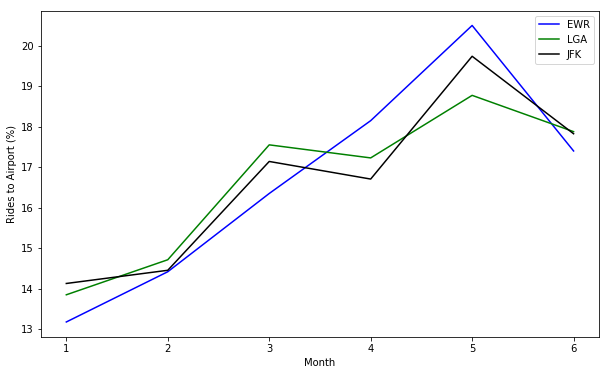

In [205]:
MonthlyTraffic(ewr, lga, jfk, ['EWR','LGA','JFK'], 'dropoff_latitude',  'Rides to Airport (%)','cnt-percent')

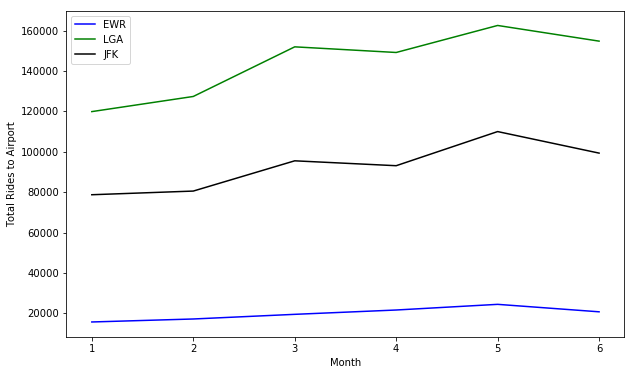

In [206]:
MonthlyTraffic(ewr, lga, jfk, ['EWR','LGA','JFK'], 'dropoff_latitude','Total Rides to Airport', 'cnt-total')

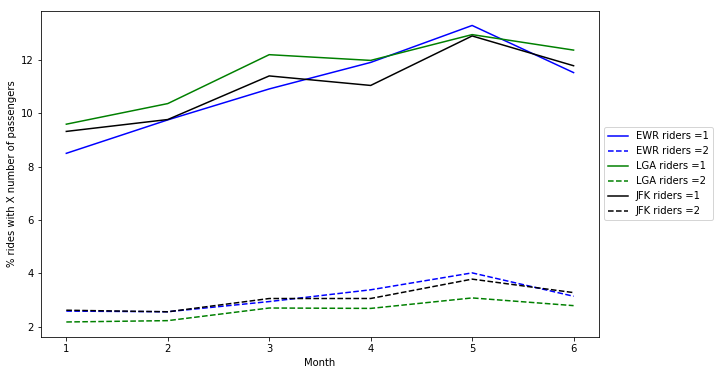

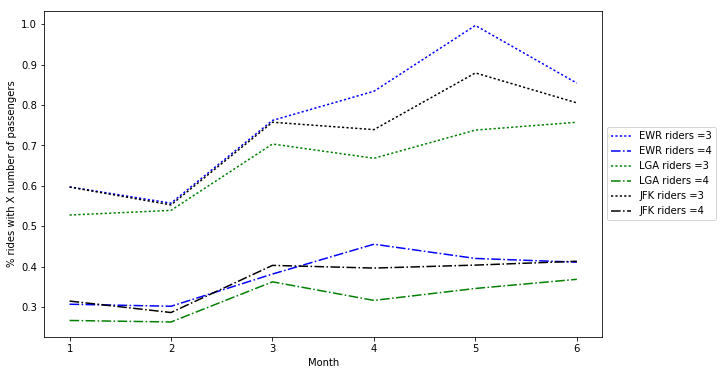

In [207]:
MonthlyTraffic(ewr, lga, jfk, ['EWR','LGA','JFK'], 'passenger_count', '% rides with X number of passengers', 'cnt-percent')

## Newark

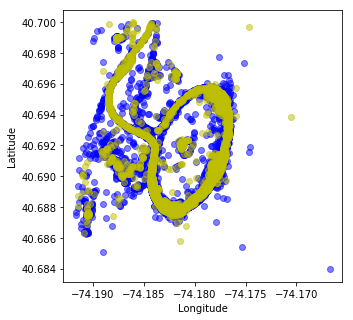

In [208]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewr.dropoff_longitude[ewr.rate_code == 3], ewr.dropoff_latitude[ewr.rate_code == 3],
        'ob', alpha =0.5 )
ax.plot( ewr.dropoff_longitude[ewr.rate_code != 3], ewr.dropoff_latitude[ewr.rate_code != 3],
        'oy', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

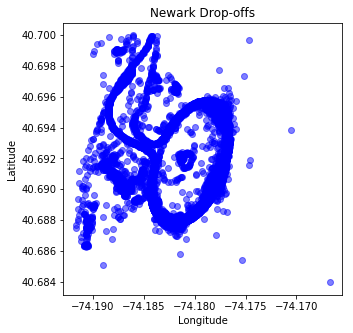

In [209]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewr.dropoff_longitude, ewr.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Newark Drop-offs')

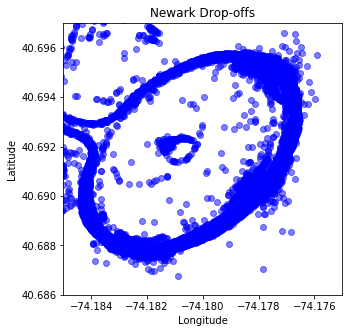

In [210]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewr.dropoff_longitude, ewr.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim([-74.185,-74.175])
ax.set_ylim([40.686,40.697])
ax.set_title('Newark Drop-offs')

clean data to only inlude points on terminals ( exclude parking lot drop-offs, etc).

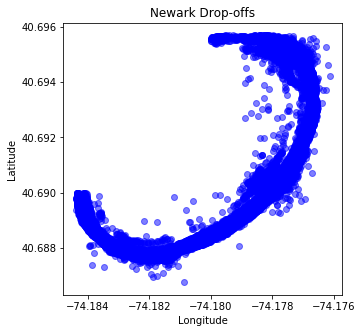

In [211]:
ewrC = ewr[['dropoff_latitude','dropoff_longitude']]
ewrC = ewrC[(ewr.dropoff_longitude < -74.176) & (ewr.dropoff_longitude > -74.1844) 
           & (ewr.dropoff_latitude < 40.6957) & (ewr.dropoff_latitude > 40.686)]

ewrC = ewrC[~((ewrC.dropoff_longitude < -74.1791) & (ewrC.dropoff_longitude > -74.1844) 
              & (ewrC.dropoff_latitude < 40.6954) & (ewrC.dropoff_latitude > 40.690) ) 
           & ~( (ewrC.dropoff_longitude < -74.180) &  (ewrC.dropoff_latitude > 40.695) ) 
           & ~ ((ewrC.dropoff_longitude > -74.178) &  (ewrC.dropoff_latitude < 40.689))]


fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewrC.dropoff_longitude, ewrC.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Newark Drop-offs')

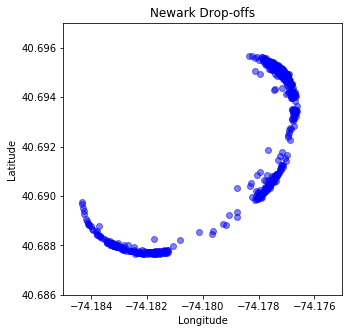

In [212]:
# one day 
day = '01-15-2016'
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewrC.dropoff_longitude.ix[day], ewrC.dropoff_latitude.ix[day],
        'ob', alpha =0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim([-74.185,-74.175])
ax.set_ylim([40.686,40.697])
ax.set_title('Newark Drop-offs')

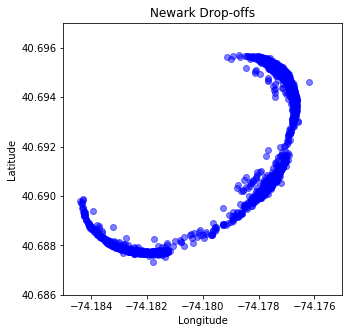

In [213]:
# 5 days 
day = '01-15-2016'
day2 = '01-20-2016'
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewrC.dropoff_longitude.ix[day:day2], ewrC.dropoff_latitude.ix[day:day2],
        'ob', alpha =0.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim([-74.185,-74.175])
ax.set_ylim([40.686,40.697])
ax.set_title('Newark Drop-offs')

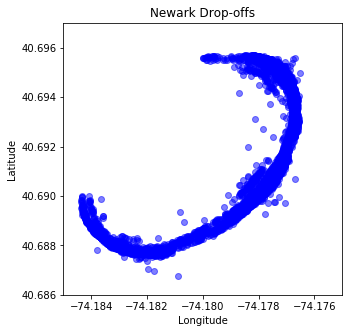

In [214]:
# one day 
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( ewrC.dropoff_longitude.ix['06-2016'], ewrC.dropoff_latitude.ix['06-2016'],
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_xlim([-74.185,-74.175])
ax.set_ylim([40.686,40.697])
ax.set_title('Newark Drop-offs')

In [215]:
print('Cleaned df:', len(ewrC))
print('One month:', len ( ewrC.dropoff_longitude.ix['03-2016']))
print('Five days:', len(ewrC.dropoff_longitude.ix[day:day2]))
print('One day:', len (ewrC.dropoff_longitude.ix[day]))

Cleaned df: 114346
One month: 18699
Five days: 3274
One day: 696


In [216]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [217]:
np.random.seed(95)

In [218]:
def MiniBatchKMeansFit( df, nclusters , colors, add2df ):
    mbKmeans = MiniBatchKMeans(init='k-means++', n_clusters=nclusters)
    X = df.as_matrix()
    mbKmeans.fit(X)
    cluster_centers = np.sort(mbKmeans.cluster_centers_, axis=0)
    mbk_means_labels = pairwise_distances_argmin(X, cluster_centers)
    if add2df == 1:
        df['member'] = mbk_means_labels
    # plot results 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for f, col in zip(range(nclusters), colors):
        members = mbk_means_labels == f
        center = cluster_centers[f]
        ax.plot(X[members,1],X[members,0], '.', color=col, alpha = 0.5)
        ax.plot(center[1], center[0], 'o', color = col,  markeredgecolor ='k', markersize= 10)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

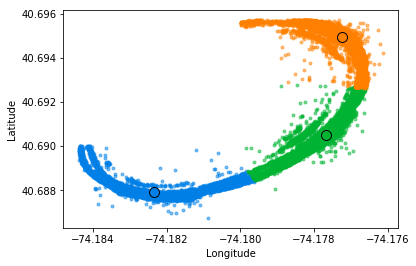

In [222]:
colors = [(0, .5, .9), (0 ,0.7, .2) ,(1,.5, .0)]
MiniBatchKMeansFit( ewrC, 3 , colors, 1)

In [229]:
ewrC.head()

,dropoff_latitude,dropoff_longitude,member
pickup_datetime,,,
2016-06-03 11:57:16,40.689510,-74.178413,1
2016-03-06 06:27:03,40.693913,-74.176697,2
2016-01-06 14:21:29,40.690540,-74.177559,1
2016-05-11 14:41:27,40.695053,-74.177254,2
2016-05-03 13:07:31,40.695091,-74.177361,2


### Selected airlines market share - Newark only

In [240]:
# member 0 - Terminal A, member 1 - Terminal B, member 2 - Terminal C [United only]
ewrTot = ewrC.groupby('member').count()
ewrTot

,dropoff_latitude,dropoff_longitude
member,,
0,27033,27033
1,27186,27186
2,60127,60127


In [235]:
ewrTot.dropoff_latitude.sum()

114346

In [233]:
ewrA

,Tshort,airline,frac
0,A,Air Canada,0.141975
1,A,Alaska Airlines,0.030864
2,A,American Airlines,0.061728
3,A,JetBlue,0.040123
4,A,Southwest,0.030864
5,A,United Airlines,0.682099
6,A,Virgin America,0.012346


In [242]:
# Terminal C operates only United
msC_United = 100*ewrTot.dropoff_latitude[2] / (ewrTot.dropoff_latitude.sum())
msC_United

52.583387263218654

In [249]:
# add total number of rides to df, and market share per airport 
def AirportMarketShare(dfFrac,  dfCluster, member):
    dfFrac['Tot_rides'] = dfCluster.dropoff_latitude[member]*dfFrac.frac
    dfFrac['marketShare'] = 100*dfCluster.dropoff_latitude[member]*dfFrac.frac/ (dfCluster.dropoff_latitude.sum())

In [476]:
AirportMarketShare(ewrTermA,  ewrTot, 0)
ewrTermA

,Tshort,airline,frac,Tot_rides,marketShare
0,A,Air Canada,0.141975,3838.018519,3.356496
1,A,Alaska Airlines,0.030864,834.351852,0.729673
2,A,American Airlines,0.061728,1668.703704,1.459346
3,A,JetBlue,0.040123,1084.657407,0.948575
4,A,Southwest,0.030864,834.351852,0.729673
5,A,United Airlines,0.682099,18439.175926,16.125773
6,A,Virgin America,0.012346,333.740741,0.291869


In [477]:
AirportMarketShare(ewrTermC,  ewrTot, 2)
ewrTermC

,Tshort,airline,frac,Tot_rides,marketShare
0,C,United,1.0,60127.0,52.583387
1,C,United Express,0.0,0.0,0.000000


In [268]:
unitedEwrTot= ewrA.marketShare[ewrA.airline =='United Airlines'].tolist()[0] + ewrC.marketShare[ewrC.airline =='United'].tolist()[0]
unitedEwrTot

68.70915985336254

In [532]:
# Plots market share of evaluated airlines for a given airport
def BarPlotMSAirport(df, xlabel, titleplt, col):
    df_sub = df[df.marketShare > 0].groupby('airline').sum().sort_values('marketShare', ascending=1)
    row_pos = np.arange(len(df_sub.marketShare))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.barh(row_pos, df_sub.marketShare, color= col)
    ax.set_yticks(row_pos)
    ax.set_yticklabels(df_sub.index)
    ax.set_xlabel(xlabel)
    ax.set_title(titleplt)

In [534]:
ewrTally = pd.concat([ewrTermA, ewrTermC], ignore_index = True)
ewrTally.airline[ewrTally.airline == 'United Airlines'] = 'United'
ewrTally

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Tshort,airline,frac,Tot_rides,marketShare
0,A,Air Canada,0.141975,3838.018519,3.356496
1,A,Alaska Airlines,0.030864,834.351852,0.729673
2,A,American Airlines,0.061728,1668.703704,1.459346
3,A,JetBlue,0.040123,1084.657407,0.948575
4,A,Southwest,0.030864,834.351852,0.729673
5,A,United,0.682099,18439.175926,16.125773
6,A,Virgin America,0.012346,333.740741,0.291869
7,C,United,1.000000,60127.000000,52.583387
8,C,United Express,0.000000,0.000000,0.000000


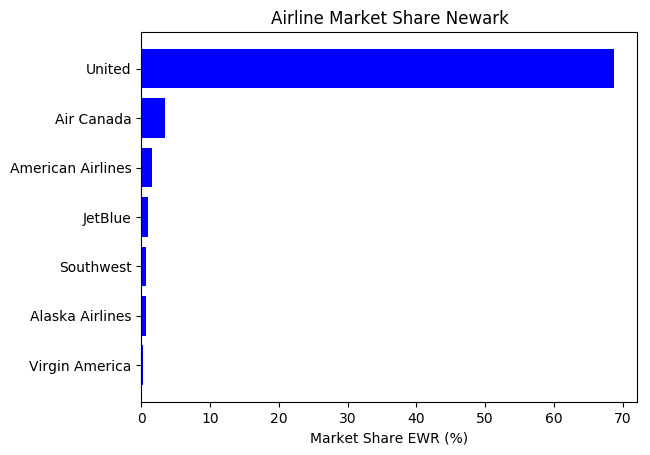

In [535]:
BarPlotMSAirport(ewrTally,  'Market Share EWR (%)', 'Airline Market Share Newark', 'b')

# JFK

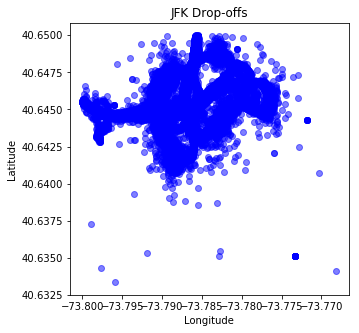

In [269]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( jfk.dropoff_longitude, jfk.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

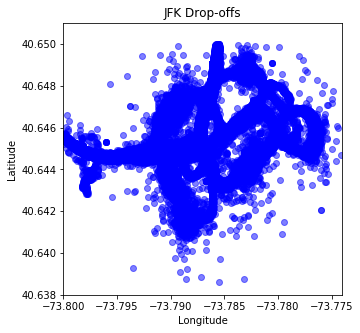

In [92]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( jfk.dropoff_longitude, jfk.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([40.638, 40.6510])
ax.set_xlim([-73.8, -73.774])
ax.set_title('JFK Drop-offs')

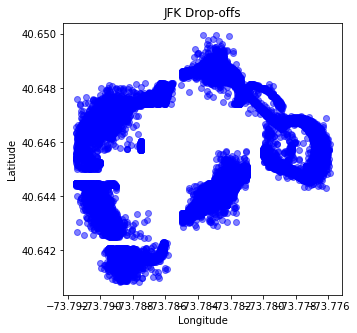

In [341]:
jfkC = jfk[['dropoff_latitude','dropoff_longitude']]

jfkC = jfkC[(jfkC.dropoff_longitude < -73.7759) & (jfkC.dropoff_longitude > -73.7915)
           & (jfkC.dropoff_latitude > 40.6408)]

jfkC = jfkC[ ~((jfkC.dropoff_longitude < -73.783) & (jfkC.dropoff_longitude > -73.790) 
              & (jfkC.dropoff_latitude > 40.6445) & (jfkC.dropoff_latitude < 40.6457)) 
           & ~((jfkC.dropoff_longitude < -73.781) & (jfkC.dropoff_longitude > -73.7875) 
              & (jfkC.dropoff_latitude > 40.6457) & (jfkC.dropoff_latitude < 40.6474))
           & ~((jfkC.dropoff_longitude < -73.7855) & (jfkC.dropoff_latitude > 40.6482)) 
           & ~((jfkC.dropoff_longitude > -73.7815) & (jfkC.dropoff_latitude > 40.6485))
           & ~((jfkC.dropoff_longitude < -73.7846) & (jfkC.dropoff_longitude > -73.789) 
              & (jfkC.dropoff_latitude > 40.6434) & (jfkC.dropoff_latitude < 40.6445))
           & ~((jfkC.dropoff_longitude > -73.7785) & (jfkC.dropoff_latitude > 40.647))
           & ~((jfkC.dropoff_longitude > -73.7857) & (jfkC.dropoff_latitude < 40.6428))
           & ~((jfkC.dropoff_longitude > -73.7816) & (jfkC.dropoff_latitude < 40.6443))
           & ~((jfkC.dropoff_longitude < -73.79) & (jfkC.dropoff_latitude < 40.6423))
           & ~((jfkC.dropoff_longitude < -73.785) & (jfkC.dropoff_latitude > 40.6482))
           & ~((jfkC.dropoff_longitude < -73.79)  
              & (jfkC.dropoff_latitude > 40.6445) & (jfkC.dropoff_latitude < 40.645))
           & ~((jfkC.dropoff_longitude > -73.787) & (jfkC.dropoff_longitude < -73.785)
               & (jfkC.dropoff_latitude > 40.6423) & (jfkC.dropoff_latitude < 40.64435))
           &~((jfkC.dropoff_longitude > -73.781) & (jfkC.dropoff_longitude < -73.780)
               & (jfkC.dropoff_latitude > 40.644) & (jfkC.dropoff_latitude < 40.647))
           & ~((jfkC.dropoff_longitude > -73.791) & (jfkC.dropoff_longitude < -73.7875)
               & (jfkC.dropoff_latitude > 40.6421) & (jfkC.dropoff_latitude < 40.6425))]

jfkM = jfkC[((jfkC.dropoff_longitude > -73.791) & (jfkC.dropoff_longitude < -73.7875)
               & (jfkC.dropoff_latitude > 40.6421) & (jfkC.dropoff_latitude < 40.6424))]

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( jfkC.dropoff_longitude, jfkC.dropoff_latitude,
        'ob', alpha =0.5 )
ax.plot( jfkM.dropoff_longitude, jfkM.dropoff_latitude,
        'oy', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

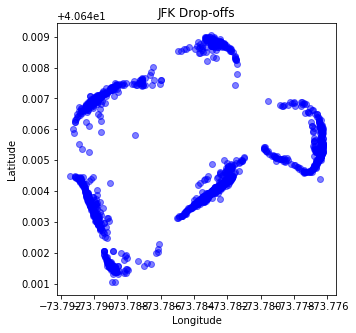

In [342]:
day = '05-03-2016'
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( jfkC.dropoff_longitude.ix[day], jfkC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

In [344]:
print('Cleaned df:', len(jfkC))
print('One month:', len ( jfkC.dropoff_longitude.ix['03-2016']))
print('Five days:', len(jfkC.dropoff_longitude.ix['04-01-2016':'04-06-2016']))
print('One day:', len (jfkC.dropoff_longitude.ix[day]))

Cleaned df: 473059
One month: 80922
Five days: 14620
One day: 78492


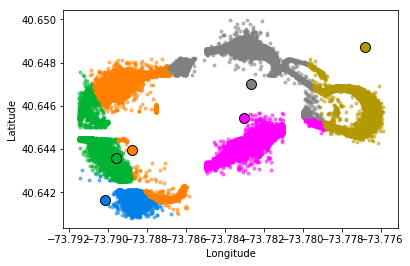

In [345]:
colors = [(0, .5, .9), (0 ,0.7, .2) ,(1,.5, .0),  (1,0,1), (.5,.5,.5), (.7,.6,0)]
MiniBatchKMeansFit( jfkC, 6 , colors, 0)

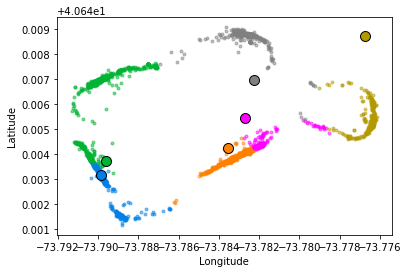

In [346]:
colors = [(0, .5, .9), (0 ,0.7, .2) ,(1,.5, .0),  (1,0,1), (.5,.5,.5), (.7,.6,0)]
MiniBatchKMeansFit( jfkC.ix['05-07-2016'], 6 , colors, 0)

**Notes:** k-means mini batch does not do a good job for this data, probably because it assumes circular regions.  Tried adjusting hyper parameters and training on subset of data, but results are similar. Will test other clustering options. 

In [311]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')

In [347]:
X = jfkC.ix['05-20-2016'].as_matrix()
labels = model.fit_predict(X)

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


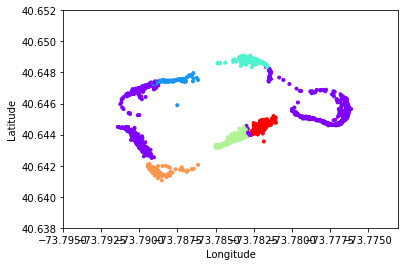

In [348]:
plt.scatter( X[:, 1],X[:, 0], c=labels, marker='.', cmap='rainbow')
plt.ylim([40.638,40.652])
plt.xlim([-73.795, -73.773])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [290]:
from sklearn.mixture import GaussianMixture

In [356]:
X = jfkC.as_matrix()
gmm = GaussianMixture(n_components=6).fit(X)

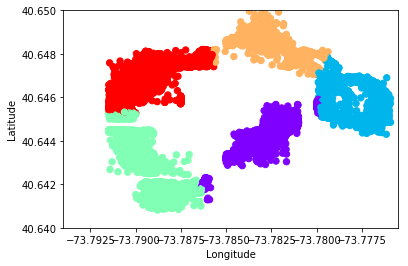

In [357]:
labels = gmm.predict(X)
plt.scatter( X[:, 1],X[:, 0], c=labels, s=40, cmap='rainbow')
plt.ylim([40.640,40.65])
plt.xlim([-73.794, -73.7755])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Gaussian mixture model does the best compared to min-batch K-means and spectral clustering. It does not recognize difference between Terminal 1 and terminal 2, but can adjust manually using Latitude as threshold. Some "splill over" between identified clusters by routine and what is obvious by eye, though this is minimal. 

In [360]:
jfkC['member'] = labels

* member = 1 : Terminal 4
* member = 2 : Terminal 5
* member = 3 : Terminal 1,2
* member = 4 : Terminal 7
* member = 5 : Terminal 8

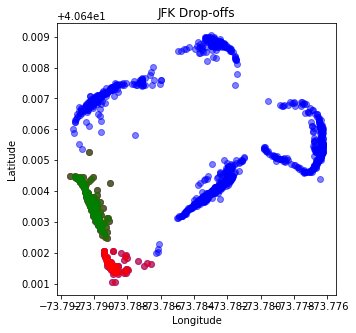

In [374]:
day = '05-03-2016'
mem = 3
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( jfkC.dropoff_longitude.ix[day], jfkC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.plot( jfkC[jfkC.member ==mem].dropoff_longitude.ix[day], 
        jfkC[jfkC.member ==mem].dropoff_latitude.ix[day],
        'or', alpha =0.5 )
ax.plot( jfkC[(jfkC.member ==mem) & (jfkC.dropoff_latitude > 40.6425)].dropoff_longitude.ix[day], 
        jfkC[(jfkC.member ==mem) & (jfkC.dropoff_latitude > 40.6425)].dropoff_latitude.ix[day],
        'og', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

In [376]:
jfkC.member[(jfkC.member == 3) & (jfkC.dropoff_latitude > 40.6425)] = [6]*len(jfkC.member[(jfkC.member == 3) & (jfkC.dropoff_latitude > 40.6425)])

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [377]:
jfkC.member.unique()

array([2, 1, 5, 4, 6, 3])

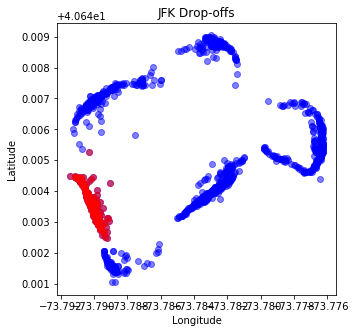

In [379]:
day = '05-03-2016'
mem = 6
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( jfkC.dropoff_longitude.ix[day], jfkC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.plot( jfkC[jfkC.member ==mem].dropoff_longitude.ix[day], 
        jfkC[jfkC.member ==mem].dropoff_latitude.ix[day],
        'or', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

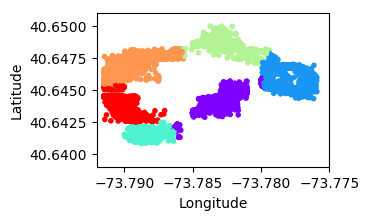

In [606]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)
ax.scatter( jfkC.dropoff_longitude, jfkC.dropoff_latitude, c=jfkC.member,marker='.', cmap='rainbow')
ax.set_ylim([40.639,40.651])
ax.set_xlim([-73.792, -73.775])
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

* member = 1 : Terminal 4
* member = 2 : Terminal 5
* member = 3 : Terminal 2
* member = 4 : Terminal 7
* member = 5 : Terminal 8
* member = 6 : Terminal 1

In [479]:
jfkTot = jfkC.groupby('member').count()
jfkTot

,dropoff_latitude,dropoff_longitude
member,,
1,146494,146494
2,93319,93319
3,28547,28547
4,46099,46099
5,93024,93024
6,65576,65576


In [480]:
AirportMarketShare(jfk2, jfkTot, 3)
jfk2

,Tshort,airline,frac,Tot_rides,marketShare
0,2,Delta Air Lines,1.0,28547.0,6.034554


In [481]:
AirportMarketShare(jfk5, jfkTot, 2)
jfk5

,Tshort,airline,frac,Tot_rides,marketShare
0,5,Aer Lingus,0.050562,4718.376404,0.997418
1,5,Hawaiian Airlines,0.230337,21494.825843,4.543794
2,5,JetBlue,0.634831,59241.837079,12.523139
3,5,TAP Portugal,0.084270,7863.960674,1.662364


In [482]:
AirportMarketShare(jfk8, jfkTot,5 )
jfk8

,Tshort,airline,frac,Tot_rides,marketShare
0,8,Air Berlin,0.000000,0.000000,0.000000
1,8,Alaska Airlines,0.152542,14190.101695,2.999647
2,8,American Airlines,0.627119,58337.084746,12.331883
3,8,American Eagle,0.000000,0.000000,0.000000
4,8,Cathay Pacific,0.101695,9460.067797,1.999765
5,8,Finnair,0.118644,11036.745763,2.333059
6,8,LATAM,0.000000,0.000000,0.000000
7,8,Royal Jordanian,0.000000,0.000000,0.000000


In [484]:
jfkTally = pd.concat([jfk2, jfk5, jfk8], ignore_index=True )
jfkTally

,Tshort,airline,frac,Tot_rides,marketShare
0,2,Delta Air Lines,1.000000,28547.000000,6.034554
1,5,Aer Lingus,0.050562,4718.376404,0.997418
2,5,Hawaiian Airlines,0.230337,21494.825843,4.543794
3,5,JetBlue,0.634831,59241.837079,12.523139
4,5,TAP Portugal,0.084270,7863.960674,1.662364
5,8,Air Berlin,0.000000,0.000000,0.000000
6,8,Alaska Airlines,0.152542,14190.101695,2.999647
7,8,American Airlines,0.627119,58337.084746,12.331883
8,8,American Eagle,0.000000,0.000000,0.000000
9,8,Cathay Pacific,0.101695,9460.067797,1.999765


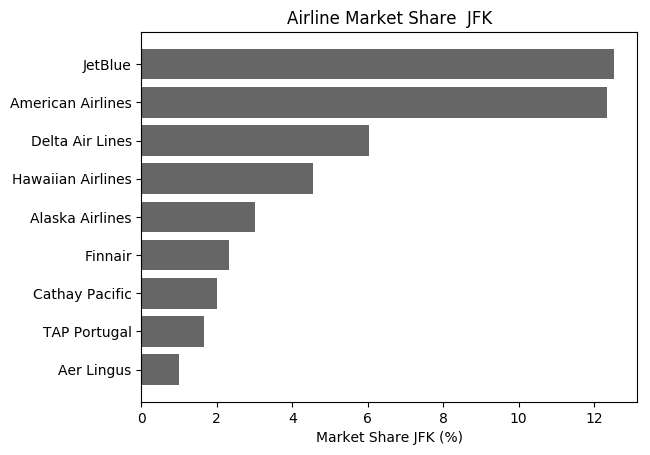

In [531]:
BarPlotMSAirport(jfkTally, 'Market Share JFK (%)', 'Airline Market Share  JFK', (.4,.4,.4))

In [ ]:
row_pos=np.arange(len(VarImportance))
    # inner tree variability
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.barh(row_pos, VarImportance,color=(0,0.4,1), xerr=std, ecolor='r')
    ax.set_yticks(row_pos)
    ax.set_yticklabels(VarImportance.index)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Feature Ranking')
    ax.set_title('Random Forest Importance of Variables')

# La Guardia

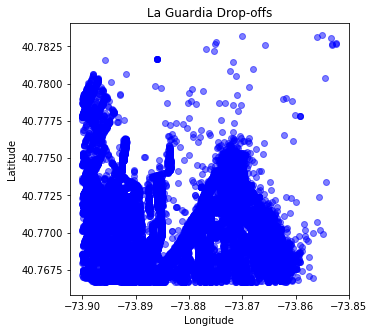

In [264]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( lga.dropoff_longitude, lga.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('La Guardia Drop-offs')

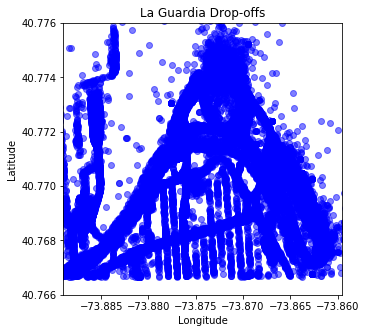

In [275]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( lga.dropoff_longitude, lga.dropoff_latitude,
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([40.766, 40.776])
ax.set_xlim([-73.889, -73.8595])
ax.set_title('La Guardia Drop-offs')

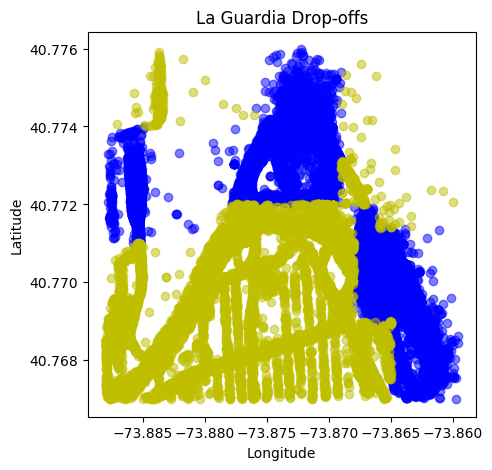

In [536]:
lgaC = lga[['dropoff_latitude','dropoff_longitude']]

lgaC = lgaC[(lgaC.dropoff_longitude < -73.8595) & (lgaC.dropoff_longitude > -73.888) 
            & (lgaC.dropoff_latitude < 40.776) & (lgaC.dropoff_latitude > 40.767)]

lgaM = lgaC[((lgaC.dropoff_longitude < -73.876) & (lgaC.dropoff_latitude > 40.774))
           | ((lgaC.dropoff_longitude < -73.868) & (lgaC.dropoff_latitude < 40.771))
           | ((lgaC.dropoff_latitude < 40.769) & (lgaC.dropoff_longitude < -73.865))
           | ((lgaC.dropoff_latitude > 40.773) & (lgaC.dropoff_longitude > -73.869))
           | ((lgaC.dropoff_latitude > 40.7714) & (lgaC.dropoff_longitude > -73.866))
           | ((lgaC.dropoff_longitude < -73.868) & (lgaC.dropoff_longitude > -73.880) 
            & (lgaC.dropoff_latitude < 40.772) & (lgaC.dropoff_latitude > 40.771))
           | ((lgaC.dropoff_longitude > -73.869) 
            & (lgaC.dropoff_latitude < 40.773) & (lgaC.dropoff_latitude > 40.772))]

lgaC = lgaC[ ~((lgaC.dropoff_longitude < -73.876) & (lgaC.dropoff_latitude > 40.774))
           & ~((lgaC.dropoff_longitude < -73.868) & (lgaC.dropoff_latitude < 40.771))
           & ~((lgaC.dropoff_latitude < 40.769) & (lgaC.dropoff_longitude < -73.865))
           & ~((lgaC.dropoff_latitude > 40.773) & (lgaC.dropoff_longitude > -73.869))
           & ~((lgaC.dropoff_latitude > 40.7714) & (lgaC.dropoff_longitude > -73.866))
           & ~((lgaC.dropoff_longitude < -73.868) & (lgaC.dropoff_longitude > -73.880) 
           & (lgaC.dropoff_latitude < 40.772) & (lgaC.dropoff_latitude > 40.771))
           & ~((lgaC.dropoff_longitude > -73.869) 
            & (lgaC.dropoff_latitude < 40.773) & (lgaC.dropoff_latitude > 40.772)) 
          
           ]

# & ~((lgaC.dropoff_longitude > -73.87) & (lgaC.dropoff_longitude  < -73.860) 
#               & (lgaC.dropoff_latitude >40.769 ) & (lgaC.dropoff_latitude < 40.7695))

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( lgaC.dropoff_longitude, lgaC.dropoff_latitude,
        'ob', alpha =0.5 )
ax.plot( lgaM.dropoff_longitude, lgaM.dropoff_latitude,
        'oy', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('La Guardia Drop-offs')

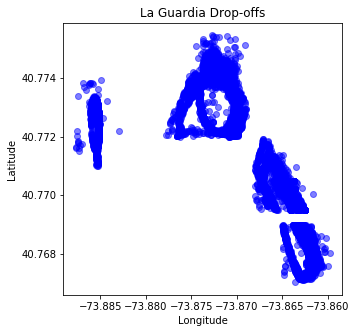

In [482]:
day = '06-2016'
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(lgaC.dropoff_longitude.ix[day], lgaC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('La Guardia Drop-offs')

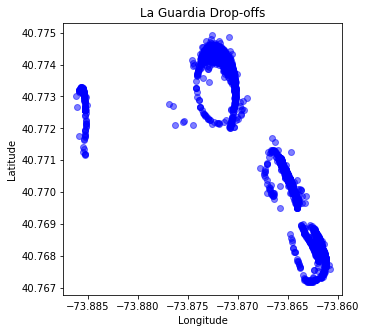

In [483]:
day = '05-20-2016'
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(lgaC.dropoff_longitude.ix[day], lgaC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('La Guardia Drop-offs')

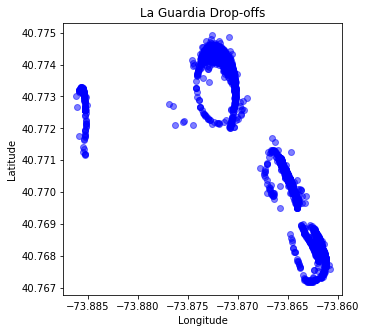

In [484]:
day = '05-20-2016'
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(lgaC.dropoff_longitude.ix[day], lgaC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('La Guardia Drop-offs')

In [539]:
print('Cleaned df:', len(lgaC))
print('One month:', len ( lgaC.dropoff_longitude.ix['03-2016']))
print('Five days:', len(lgaC.dropoff_longitude.ix['04-01-2016':'04-06-2016']))
print('One day:', len (lgaC.dropoff_longitude.ix[day]))

Cleaned df: 822099
One month: 144694
Five days: 26024
One day: 4035


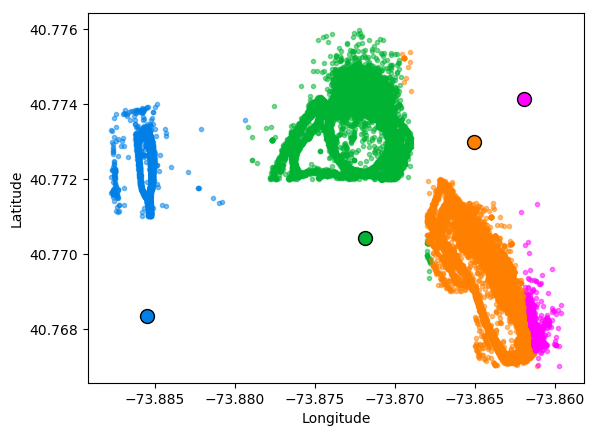

In [537]:
colors = [(0, .5, .9), (0 ,0.7, .2) ,(1,.5, .0), (1,0,1)]
MiniBatchKMeansFit( lgaC, 4 , colors, 0)

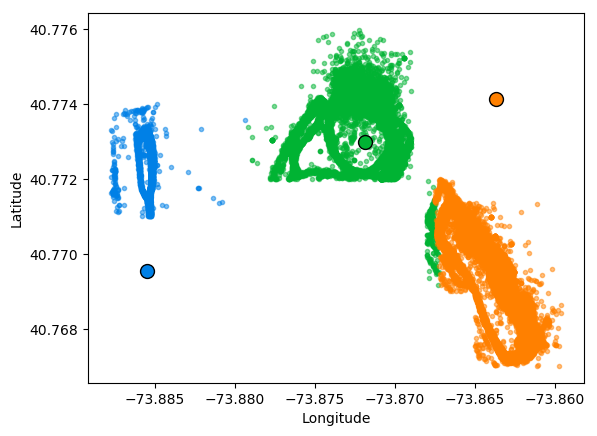

In [538]:
colors = [(0, .5, .9), (0 ,0.7, .2) ,(1,.5, .0), (1,0,1)]
MiniBatchKMeansFit( lgaC, 3 , colors, 0)

Mini batch is really fast and was able to run LGA data, could make distinction between terminals C and D based on latitude. Will try other clustering method for day data, but am afraid they would be too slow to run all the data at once. With more time, if other methods are better, could set them up in batch process.  

In [540]:
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
X = lgaC.ix['05-20-2016'].as_matrix()
labels = model.fit_predict(X)

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


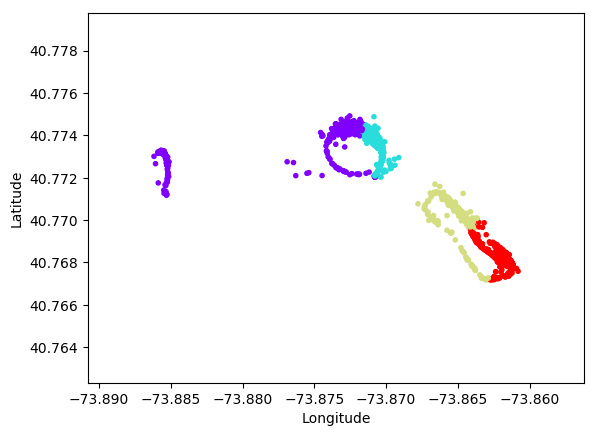

In [542]:
plt.scatter( X[:, 1],X[:, 0], c=labels, marker='.', cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [551]:
X = lgaC.ix['05-20-2016'].as_matrix()
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

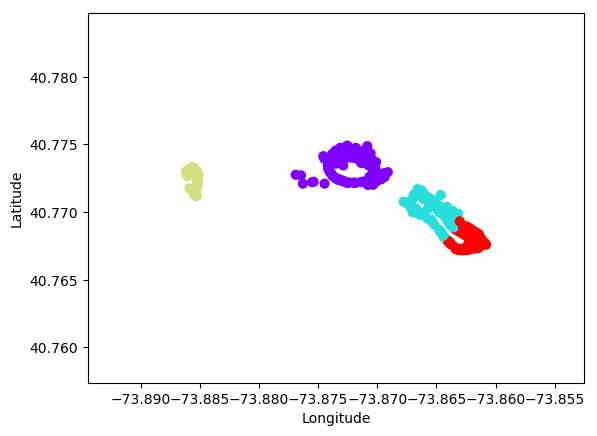

In [548]:
plt.scatter( X[:, 1],X[:, 0], c=labels, s=40, cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [552]:
X2 =lgaC.as_matrix()
labels = gmm.predict(X2)

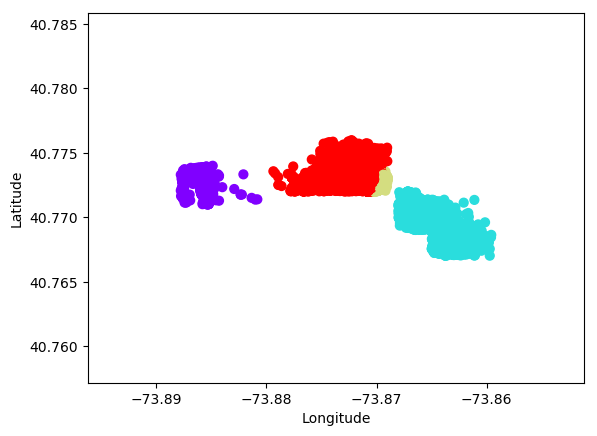

In [553]:
plt.scatter( lgaC.dropoff_longitude, lgaC.dropoff_latitude, c=labels, s=40, cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [549]:
X = lgaC.ix['05-2016'].as_matrix()
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

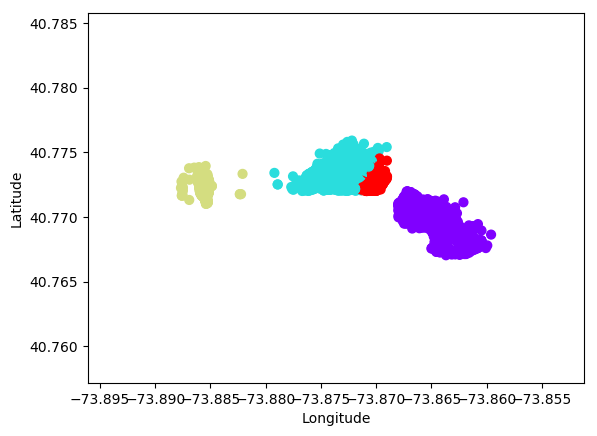

In [550]:
plt.scatter( X[:, 1],X[:, 0], c=labels, s=40, cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

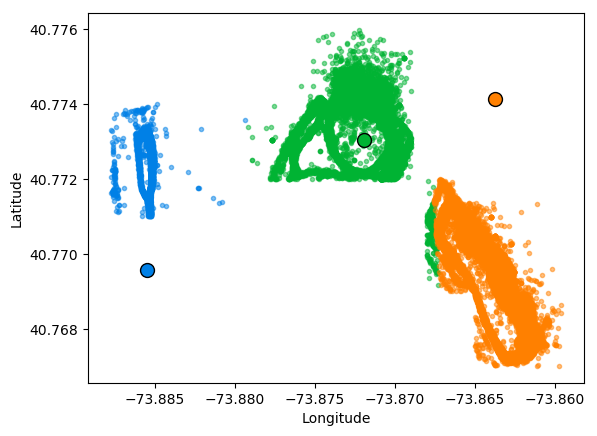

In [554]:
# will use results from mini batch and use latitude
colors = [(0, .5, .9), (0 ,0.7, .2) ,(1,.5, .0), (1,0,1)]
MiniBatchKMeansFit( lgaC, 3 , colors, 1)

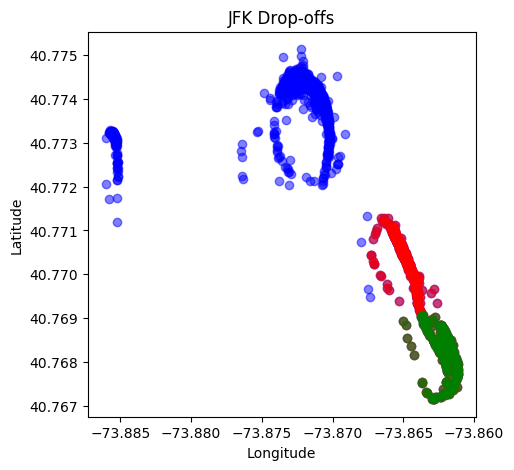

In [560]:
day = '05-03-2016'
lat = 40.7691
mem = 2
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( lgaC.dropoff_longitude.ix[day], lgaC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.plot( lgaC[lgaC.member ==mem].dropoff_longitude.ix[day], 
        lgaC[lgaC.member ==mem].dropoff_latitude.ix[day],
        'or', alpha =0.5 )
ax.plot( lgaC[(lgaC.member ==mem) & (lgaC.dropoff_latitude < lat)].dropoff_longitude.ix[day], 
        lgaC[(lgaC.member ==mem)  & (lgaC.dropoff_latitude < lat)].dropoff_latitude.ix[day],
        'og', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

In [561]:
lat = 40.7691
lgaC.member.loc[(lgaC.member == 2) & (lgaC.dropoff_latitude < lat) ] = [3]*len(lgaC.member[(lgaC.member == 2) & (lgaC.dropoff_latitude < lat) ])

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


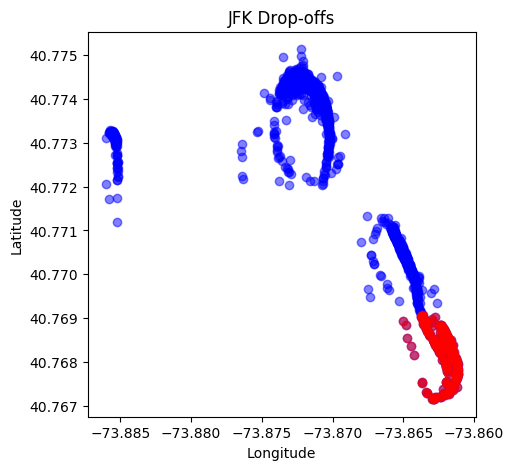

In [565]:
day = '05-03-2016'
mem = 3
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot( lgaC.dropoff_longitude.ix[day], lgaC.dropoff_latitude.ix[day],
        'ob', alpha =0.5 )
ax.plot( lgaC[lgaC.member ==mem].dropoff_longitude.ix[day], 
        lgaC[lgaC.member ==mem].dropoff_latitude.ix[day],
        'or', alpha =0.5 )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('JFK Drop-offs')

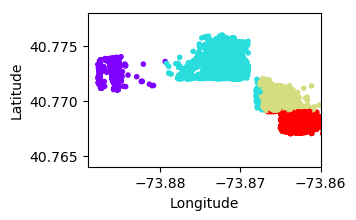

In [609]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)
ax.scatter( lgaC.dropoff_longitude, lgaC.dropoff_latitude, c=lgaC.member,marker='.', cmap='rainbow')
ax.set_ylim([40.764,40.778])
ax.set_xlim([-73.889, -73.86])
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

* Member 0 - Terminal A
* Member 1 - Terminal B
* Member 2 - Terminal C
* Member 3 - Terminal D

In [566]:
lgaTot = lgaC.groupby('member').count()
lgaTot

,dropoff_latitude,dropoff_longitude
member,,
0,26640,26640
1,448748,448748
2,200700,200700
3,146011,146011


In [567]:
AirportMarketShare(lgaTermA,  lgaTot, 0)
lgaTermA

,Tshort,airline,frac,Tot_rides,marketShare
0,A,Delta,1.0,26640.0,3.240486


In [568]:
AirportMarketShare(lgaTermB,  lgaTot, 1)
lgaTermB

,Tshort,airline,frac,Tot_rides,marketShare
0,B,Air Canda,0.000000,0.000000,0.000000
1,B,American Airlines,0.477612,214327.402985,26.070753
2,B,Envoy Airlines,0.000000,0.000000,0.000000
3,B,Frontier Airlines,0.014925,6697.731343,0.814711
4,B,JetBlue Airways,0.074627,33488.656716,4.073555
5,B,Southwest Airlines,0.126866,56930.716418,6.925044
6,B,Spirit,0.044776,20093.194030,2.444133
7,B,United Airlines,0.261194,117210.298507,14.257443
8,B,Virgin America,0.000000,0.000000,0.000000


In [569]:
AirportMarketShare(lgaTermC,  lgaTot, 2)
lgaTermC

,Tshort,airline,frac,Tot_rides,marketShare
0,C,American Airlines,0.330275,66286.238532,8.063048
1,C,Delta,0.669725,134413.761468,16.350070


In [570]:
AirportMarketShare(lgaTermD,  lgaTot, 3)
lgaTermD

,Tshort,airline,frac,Tot_rides,marketShare
0,D,Delta,0.52381,76481.952381,9.303253
1,D,WestJet,0.47619,69529.047619,8.457503


In [571]:
lgaTally = pd.concat([lgaTermA,lgaTermB,lgaTermC, lgaTermD], ignore_index = True)
lgaTally

,Tshort,airline,frac,Tot_rides,marketShare
0,A,Delta,1.000000,26640.000000,3.240486
1,B,Air Canda,0.000000,0.000000,0.000000
2,B,American Airlines,0.477612,214327.402985,26.070753
3,B,Envoy Airlines,0.000000,0.000000,0.000000
4,B,Frontier Airlines,0.014925,6697.731343,0.814711
5,B,JetBlue Airways,0.074627,33488.656716,4.073555
6,B,Southwest Airlines,0.126866,56930.716418,6.925044
7,B,Spirit,0.044776,20093.194030,2.444133
8,B,United Airlines,0.261194,117210.298507,14.257443
9,B,Virgin America,0.000000,0.000000,0.000000


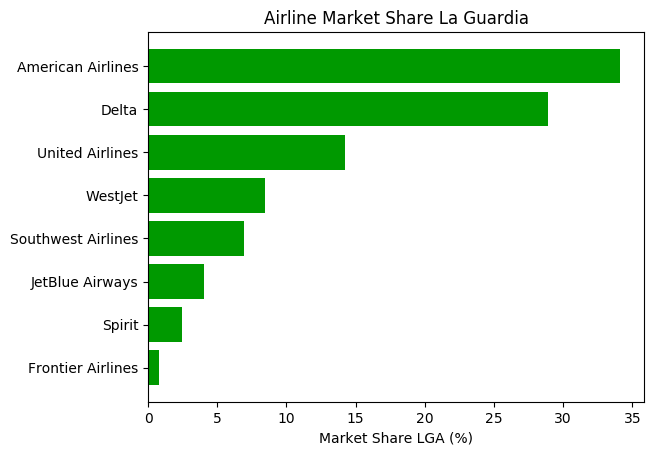

In [572]:
BarPlotMSAirport(lgaTally,  'Market Share LGA (%)', 'Airline Market Share La Guardia', (0, .6,0))

# Total market Share

In [577]:
TotalRidesOverP = (ewrTot.dropoff_latitude.sum() + jfkTot.dropoff_latitude.sum() 
                   + lgaTot.dropoff_latitude.sum())
print(TotalRidesOverP)

1409504


In [580]:
AllTally = pd.concat([ewrTally,jfkTally, lgaTally] , ignore_index = True)

In [590]:
AllTally.airline.unique().tolist()

['Air Canada',
 'Alaska Airlines',
 'American Airlines',
 'JetBlue',
 'Southwest',
 'United',
 'Virgin America',
 'United Express',
 'Delta',
 'Aer Lingus',
 'Hawaiian Airlines',
 'TAP Portugal',
 'Air Berlin',
 'American Eagle',
 'Cathay Pacific',
 'Finnair',
 'LATAM',
 'Royal Jordanian',
 'Air Canda',
 'Envoy Airlines',
 'Frontier Airlines',
 'Southwest Airlines',
 'Spirit',
 'WestJet']

In [595]:
AllTally.airline = AllTally.airline.str.replace('United Airlines', 'United')
AllTally.airline = AllTally.airline.str.replace('Delta Air Lines', 'Delta')
AllTally.airline = AllTally.airline.str.replace('JetBlue Airways', 'JetBlue')
AllTally.airline = AllTally.airline.str.replace('Southwest Airlines', 'Southwest')

In [596]:
AllTally.head()

,Tshort,airline,frac,Tot_rides,marketShare
0,A,Air Canada,0.141975,3838.018519,3.356496
1,A,Alaska Airlines,0.030864,834.351852,0.729673
2,A,American Airlines,0.061728,1668.703704,1.459346
3,A,JetBlue,0.040123,1084.657407,0.948575
4,A,Southwest,0.030864,834.351852,0.729673


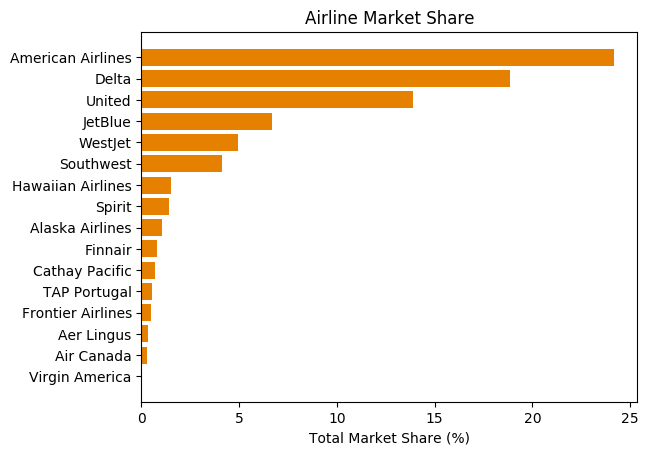

In [597]:
tally_sub = AllTally[AllTally.Tot_rides > 0].groupby('airline').sum().sort_values('Tot_rides', 
                                                                        ascending=1)
tally_sub['TotMarketShare'] = 100*tally_sub.Tot_rides / TotalRidesOverP
row_pos = np.arange(len(tally_sub.Tot_rides))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(row_pos, tally_sub.TotMarketShare, color= (.9, .5,0))
ax.set_yticks(row_pos)
ax.set_yticklabels(tally_sub.index)
ax.set_xlabel('Total Market Share (%)')
ax.set_title('Airline Market Share')

In [598]:
tally_sub

,frac,Tot_rides,marketShare,TotMarketShare
airline,,,,
Virgin America,0.012346,333.740741,0.291869,0.023678
Air Canada,0.141975,3838.018519,3.356496,0.272296
Aer Lingus,0.050562,4718.376404,0.997418,0.334754
Frontier Airlines,0.014925,6697.731343,0.814711,0.475184
TAP Portugal,0.084270,7863.960674,1.662364,0.557924
Cathay Pacific,0.101695,9460.067797,1.999765,0.671163
Finnair,0.118644,11036.745763,2.333059,0.783023
Alaska Airlines,0.183407,15024.453547,3.729320,1.065939
Spirit,0.044776,20093.194030,2.444133,1.425551
